In [4]:
import pandas as pd
import yfinance as yf
from datetime import date, datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [5]:
start_date = '2023-12-1'
end_date = '2024-12-1'
print("Start Date:",start_date," End Date:",end_date)

Start Date: 2023-12-1  End Date: 2024-12-1


In [6]:
ticker = 'TSLA'

df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300
...,...,...,...,...,...,...
2024-11-22,352.559998,352.559998,361.529999,337.700012,341.089996,89140700
2024-11-25,338.589996,338.589996,361.929993,338.200012,360.140015,95890900


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-12-01 to 2024-11-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  251 non-null    float64
 1   (Close, TSLA)      251 non-null    float64
 2   (High, TSLA)       251 non-null    float64
 3   (Low, TSLA)        251 non-null    float64
 4   (Open, TSLA)       251 non-null    float64
 5   (Volume, TSLA)     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [8]:
df.isnull().sum()

Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Date'>

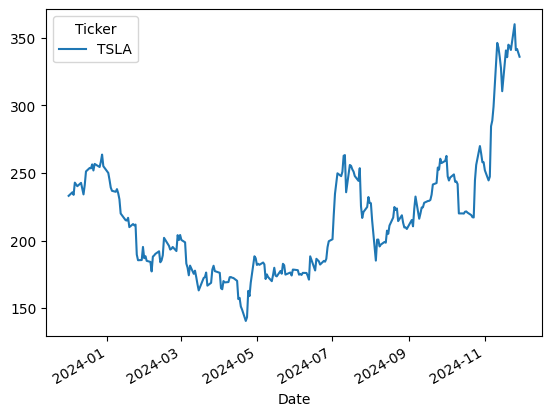

In [10]:
df['Open'].plot()

<Axes: xlabel='Date'>

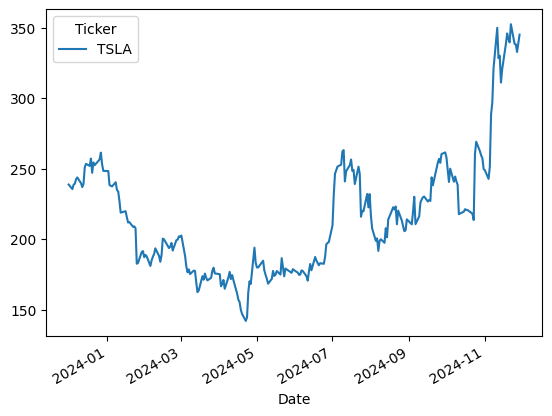

In [11]:
df['Close'].plot()

In [12]:
df['Close Rolling 10'] = df['Close'].rolling(window=10,min_periods=1).mean()
df.head(14)

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000
2023-12-08,243.839996,243.839996,245.270004,239.270004,240.270004,102980100,239.829999
2023-12-11,239.740005,239.740005,243.440002,237.449997,242.740005,97913900,239.817143
2023-12-12,237.009995,237.009995,238.990005,233.869995,238.550003,95328300,239.466249


<Axes: xlabel='Date'>

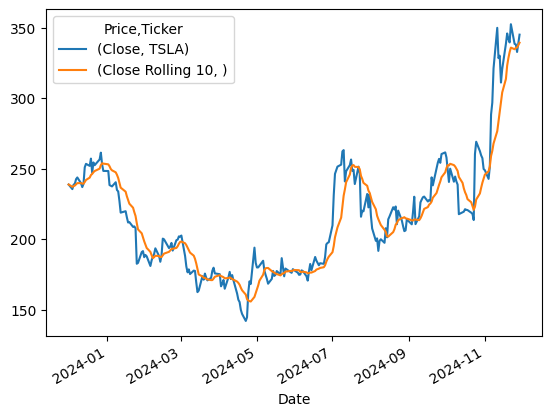

In [13]:
df[['Close','Close Rolling 10']].plot()

In [14]:
df['Close Rolling 30'] = df['Close'].rolling(window=30,min_periods=1).mean()

In [15]:
df['Close Rolling 50'] = df['Close'].rolling(window=50,min_periods=1).mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002,238.830002,238.830002
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002,237.205002,237.205002
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002,237.710002,237.710002
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000,238.125000,238.125000
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000,239.028000,239.028000
...,...,...,...,...,...,...,...,...,...
2024-11-22,352.559998,352.559998,361.529999,337.700012,341.089996,89140700,335.959998,277.358000,264.061800
2024-11-25,338.589996,338.589996,361.929993,338.200012,360.140015,95890900,334.818997,281.338999,266.298000


<Axes: xlabel='Date'>

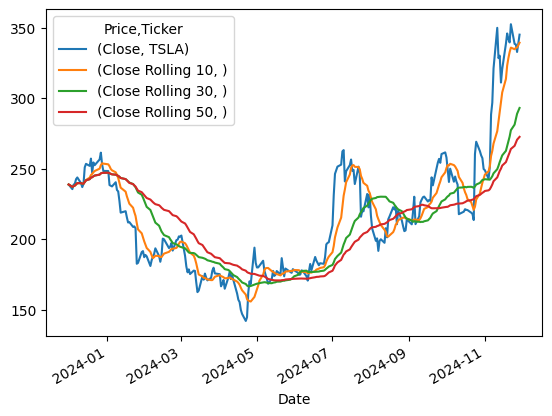

In [16]:
df[['Close','Close Rolling 10','Close Rolling 30','Close Rolling 50']].plot()

In [17]:
#cummulative MOving average
df['CMA']=df['Close'].expanding().mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,
Date,,,,,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002,238.830002,238.830002,238.830002
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002,237.205002,237.205002,237.205002
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002,237.710002,237.710002,237.710002
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000,238.125000,238.125000,238.125000
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000,239.028000,239.028000,239.028000
...,...,...,...,...,...,...,...,...,...,...
2024-11-22,352.559998,352.559998,361.529999,337.700012,341.089996,89140700,335.959998,277.358000,264.061800,214.444008
2024-11-25,338.589996,338.589996,361.929993,338.200012,360.140015,95890900,334.818997,281.338999,266.298000,214.944597


<Axes: xlabel='Date'>

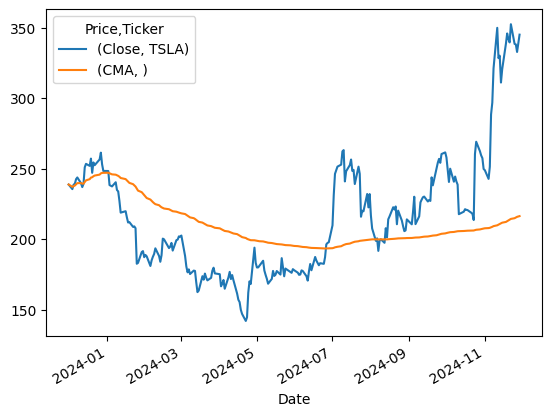

In [18]:
df[['Close','CMA']].plot()

In [19]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [20]:
adf_test(df['Close'])

ADF Statistics: -0.21546653898451512
p- value: 0.9366527608531471
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
df['First Difference'] = df['Close']-df['Close'].shift(1)
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,
Date,,,,,,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002,238.830002,238.830002,238.830002,NaN
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002,237.205002,237.205002,237.205002,-3.250000
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002,237.710002,237.710002,237.710002,3.139999
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000,238.125000,238.125000,238.125000,0.649994
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000,239.028000,239.028000,239.028000,3.270004


In [22]:
adf_test(df['First Difference'].dropna())

ADF Statistics: -15.615983299237971
p- value: 1.7558357345756553e-28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

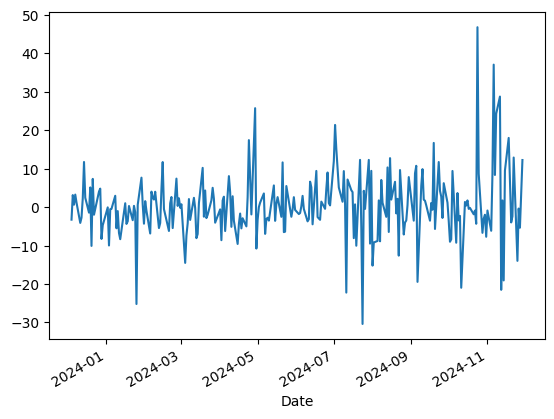

In [23]:
df['First Difference'].dropna().plot()

In [24]:
df['Second Difference'] = df['First Difference']-df['First Difference'].shift(1)
df

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference,Second Difference
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,,
Date,,,,,,,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002,238.830002,238.830002,238.830002,NaN,NaN
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002,237.205002,237.205002,237.205002,-3.250000,NaN
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002,237.710002,237.710002,237.710002,3.139999,6.389999
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000,238.125000,238.125000,238.125000,0.649994,-2.490005
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000,239.028000,239.028000,239.028000,3.270004,2.620010
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,352.559998,352.559998,361.529999,337.700012,341.089996,89140700,335.959998,277.358000,264.061800,214.444008,12.919983,15.309967
2024-11-25,338.589996,338.589996,361.929993,338.200012,360.140015,95890900,334.818997,281.338999,266.298000,214.944597,-13.970001,-26.889984


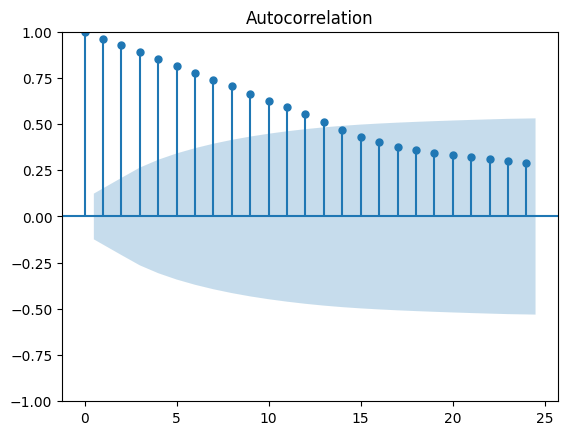

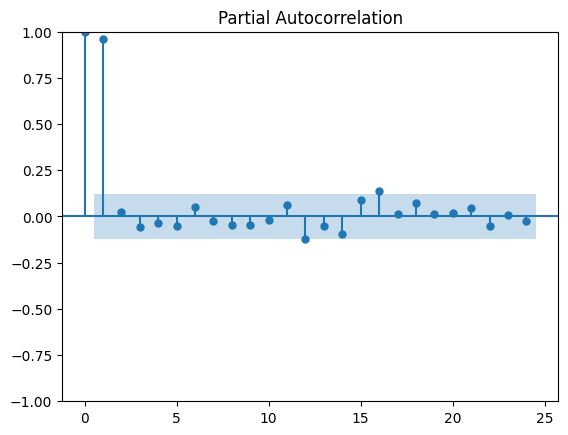

In [25]:
acf = plot_acf(df["Close"].dropna())
pacf = plot_pacf(df["Close"].dropna())

In [26]:
#step = auto_arima(df['First Difference'].dropna(),trace=True,suppress_warnings=True)
#step.summary()

In [27]:
model_ARIMA=ARIMA(df['Close'],order=(15,2,3))
model_ARIMA_fit = model_ARIMA.fit()

c:\Users\SHREYAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\SHREYAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\SHREYAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\SHREYAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible

In [28]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   TSLA   No. Observations:                  251
Model:                ARIMA(15, 2, 3)   Log Likelihood                -891.570
Date:                Tue, 17 Dec 2024   AIC                           1821.140
Time:                        15:29:35   BIC                           1887.972
Sample:                             0   HQIC                          1848.041
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1752      0.877      0.200      0.842      -1.543       1.894
ar.L2         -0.7519      0.204     -3.684      0.000      -1.152      -0.352
ar.L3         -0.5759      0.679     -0.848      0.396      -1.906       0.754
ar.L4         -0.5663      0.636     -0.891      0.373      -1.812       0.680
ar.L5         -0.5271      0.631     -0.835      0.404      -1.765       0.710
ar.L6         -0.4481      0.556     -0.805      0.421      -1.539       0.642
ar.L7         -0.4470      0.481     -0.930      0.352      -1.389       0.495
ar.L8         -0.3296      0.488     -0.675      0.500      -1.287       0.628
ar.L9         -0.2771      0.353     -0.785      0.433      -0.969       0.415
ar.L10        -0.3608      0.314     -1.149      0.250      -0.976       0.254
ar.L11        -0.0641      0.352     -0.182      0.856      -0.755       0.627
ar.L12        -0.1773      0.130     -1.362      0.173      -0.432       0.078
ar.L13        -0.0948      0.173     -0.547      0.584      -0.434       0.245
ar.L14        -0.0957      0.105     -0.912      0.362      -0.301       0.110
ar.L15        -0.0832      0.148     -0.562      0.574      -0.373       0.207
ma.L1         -1.1184      0.876     -1.277      0.202      -2.836       0.599
ma.L2          0.9733      0.938      1.037      0.300      -0.866       2.812
ma.L3         -0.1483      0.818     -0.181      0.856      -1.751       1.454
sigma2        74.9593      4.941     15.170      0.000      65.274      84.644
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               340.69
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.20   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
df1 = yf.download(ticker,start='2024-11-28',end=date.today())
df1

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-11-29,345.160004,345.160004,345.450012,334.649994,336.079987,37167600
2024-12-02,357.089996,357.089996,360.000000,351.149994,352.380005,77986500
2024-12-03,351.420013,351.420013,355.690002,348.200012,351.799988,58267200
2024-12-04,357.929993,357.929993,358.100006,348.600006,353.000000,50810900
2024-12-05,369.489990,369.489990,375.429993,359.500000,359.869995,81403600
2024-12-06,389.220001,389.220001,389.489990,370.799988,377.420013,81455800
2024-12-09,389.790009,389.790009,404.799988,378.010010,397.609985,96359200
2024-12-10,400.989990,400.989990,409.730011,390.850006,392.679993,97563600


In [30]:
pred_arima=model_ARIMA_fit.predict(start=datetime(2024,11,12),end=datetime(2024,11,29))
residuals=df['Close']-pred_arima

<Axes: xlabel='Date'>

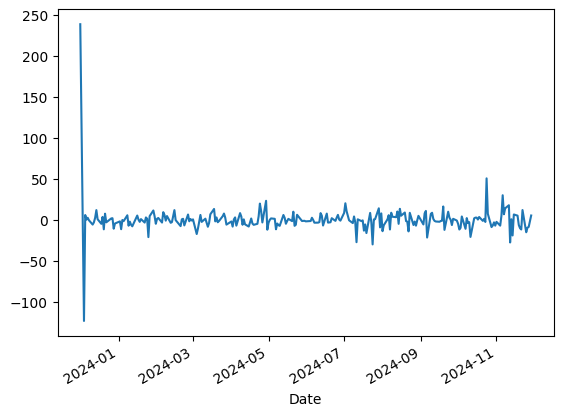

In [31]:
model_ARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

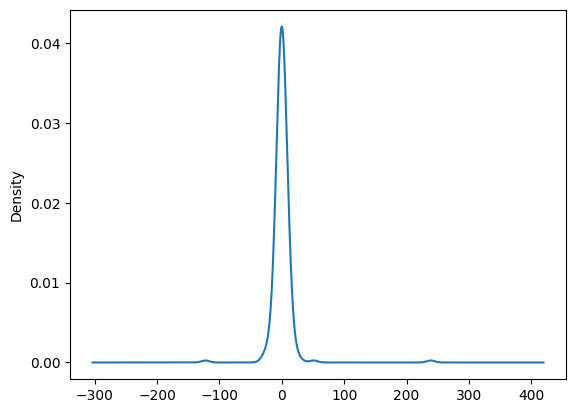

In [32]:
model_ARIMA_fit.resid.plot(kind='kde')

In [33]:
df['Predicted_ARIMA']=pred_arima

<Axes: xlabel='Date'>

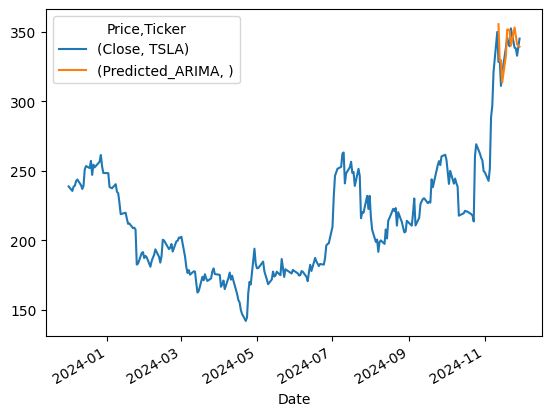

In [34]:
df[['Close','Predicted_ARIMA']].plot()

c:\Users\SHREYAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\SHREYAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


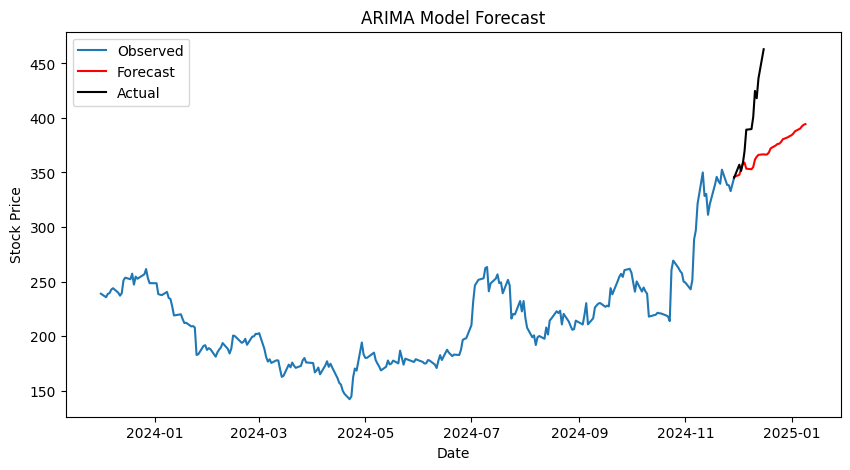

In [35]:
forecast_steps = 30
forecast = model_ARIMA_fit.forecast(steps=forecast_steps)

# Create a forecasted index (next 30 days)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=0), periods=forecast_steps, freq='B')

# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed')

plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.plot(df1['Close'],label='Actual',color='Black')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()